In [ ]:
 import matplotlib.pyplot as plt
 import numpy as np
 from matplotlib.collections import PatchCollection

In [ ]:
# two dimensional poisson disk sampling
# want one point/sample per cell

# grid_size: size of grid to generate points in
# cell_size: size per cell

# k: number of points

k = 20*20

grid_size = 1.0
cell_size = 0.05

grid = -1 * np.ones((int(grid_size/cell_size), int(grid_size/cell_size)))

In [ ]:
np.unique(grid)

array([-1.])

In [ ]:
# r: minimum distance between points
r = cell_size * np.sqrt(n) * 0.5
r

0.03535533905932738

In [ ]:
samples = np.empty((k,2)) # samples[:,0]=x, samples[:,1]=y
active = set({}) # not correctly handled, either removed from active or add new sample as long as non empty
idx = 0

for i in range(0,k):
  indices.add(i)

In [ ]:
np.unique(grid)

array([-1.])

In [ ]:
samples[idx] = np.random.rand(2) * grid_size

grid[int(samples[idx,0]/cell_size), int(samples[idx,1]/cell_size)] = 0

active.add(idx)
idx = 1

samples[0]

array([0.3146615 , 0.10499018])

In [ ]:
def grid_neighbour_close(x,y,dx,dy):
  # returns true if in neighbor dx, dy has sample s that is close to new point p
  gx = max(min(int(x/cell_size) + dx, grid.shape[0]-1),0)
  gy = max(min(int(y/cell_size) + dy, grid.shape[1]-1),0)

  if (grid[gx,gy] != -1):
    if (dx == 0 and dy == 0):
      return True

    p = np.array([x,y])
    s = samples[int(grid[gx,gy])]
    return np.linalg.norm(p-s) < r
  else:
    return False

In [ ]:
while not len(active) == 0:
    i = np.random.choice(list(active))
    found = False

    radius = np.random.rand(k)*r + r
    angle  = 2 * np.random.rand(k) * np.pi

    xs = np.minimum(np.maximum(samples[i][0] + np.cos(angle)*radius,0), grid_size-1e-9)
    ys = np.minimum(np.maximum(samples[i][1] + np.sin(angle)*radius,0), grid_size-1e-9)

    for j in range(0,k):
      x = xs[j]
      y = ys[j]

      # check if grid neighbours empty
      if (grid_neighbour_close(x,y,0,0)):
        continue
      if (grid_neighbour_close(x,y,1,0) or grid_neighbour_close(x,y,-1,0) or grid_neighbour_close(x,y,0,1) or grid_neighbour_close(x,y,0,-1)):
        continue
      if (grid_neighbour_close(x,y,1,1) or grid_neighbour_close(x,y,-1,1) or grid_neighbour_close(x,y,1,-1) or grid_neighbour_close(x,y,-1,-1)):
        continue

      samples[idx] = np.array([x,y])
      grid[int(x/cell_size),int(y/cell_size)] = idx

      active.add(idx)
      idx += 1

      found = True
      break

    if (not found):
      # remove from acive list
      active.remove(i)



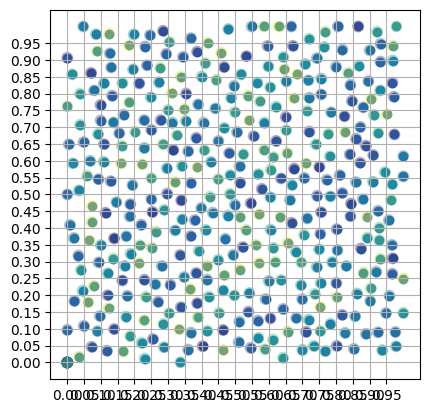

In [ ]:
plt.scatter(samples[:,0], samples[:,1])

fig = plt.gcf()
ax = fig.gca()

circles = []
names = []

for i in range(0,k):
  c = plt.Circle((samples[i,0], samples[i,1]), r/2)

  circles.append(c)
  names.append(i)

colors = np.random.rand(len(circles))
p = PatchCollection(circles, alpha=0.4)
p.set_array(colors)
ax.add_collection(p)

ax.set_xticks(np.arange(0, grid_size, cell_size))
ax.set_yticks(np.arange(0, grid_size, cell_size))

ax.set_aspect('equal', adjustable='box')

plt.grid()

plt.show()